# Sinking of Titanic: Data visualization to find out who survived

<img src="https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg">

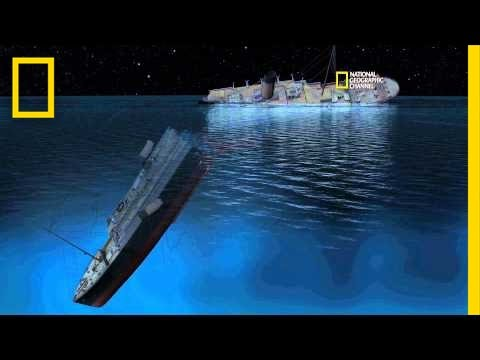

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('FSGeskFzE0s')

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline

<img src="images\titanic_datadescription.gif">

In [4]:
#http://pandas.pydata.org/pandas-docs/stable/visualization.html
#http://www.analyticsvidhya.com/blog/2014/08/baby-steps-python-performing-exploratory-analysis-python/

#import python packages (these are the most popular ones)


In [5]:
#load the data
df = pd.read_csv("data/titanic_train.csv")

In [6]:
# view first 5 rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#remove the column PassengerId
df = df.drop('PassengerId', axis = 1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
# basic statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [9]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# check missing values
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
# how many unique values in the column Embarked


## pivot table

In [12]:
# pivot talbe for survivied
df.groupby(['Survived']).count()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,
0,549,549,549,424,549,549,549,549,68,549
1,342,342,342,290,342,342,342,342,136,340


In [13]:
# pivot table for Pclass
df.groupby(['Pclass']).count()


,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,
1,216,216,216,186,216,216,216,216,176,214
2,184,184,184,173,184,184,184,184,16,184
3,491,491,491,355,491,491,491,491,12,491


In [14]:
# pivot table for Survived showing mean value, not count
df.groupby(['Survived']).mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


- The lower Pclass is, the higher survivial
- The younger someone is, the higher survival
- The higher fare is, the higher survival
- The higher the number of parent/children, the higher survival

In [15]:
# pivot table using both Survivied and Pclass
df.groupby(['Survived', 'Pclass']).count()

Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked
Survived Pclass                                                             
0        1         80   80   64     80     80      80    80     59        80
         2         97   97   90     97     97      97    97      3        97
         3        372  372  270    372    372     372   372      6       372
1        1        136  136  122    136    136     136   136    117       134
         2         87   87   83     87     87      87    87     13        87
         3        119  119   85    119    119     119   119      6       119

In [16]:
# pivot table using both Survivied and Pclass
df.groupby(['Survived', 'Pclass']).mean()

Age     SibSp     Parch       Fare
Survived Pclass                                          
0        1       43.695312  0.287500  0.300000  64.684008
         2       33.544444  0.319588  0.144330  19.412328
         3       26.555556  0.672043  0.384409  13.669364
1        1       35.368197  0.492647  0.389706  95.608029
         2       25.901566  0.494253  0.643678  22.055700
         3       20.646118  0.436975  0.420168  13.694887

In [17]:
# pivot table using both Survivied and Pclass ... use mean not count
df.groupby(['Survived', 'Sex']).count()

Pclass  Name  Age  SibSp  Parch  Ticket  Fare  Cabin  \
Survived Sex                                                            
0        female      81    81   64     81     81      81    81      6   
         male       468   468  360    468    468     468   468     62   
1        female     233   233  197    233    233     233   233     91   
         male       109   109   93    109    109     109   109     45   

                 Embarked  
Survived Sex               
0        female        81  
         male         468  
1        female       231  
         male         109

Higher survival for female than male

Both pivot_table and groupby are used to aggregate data (creating pivot table). But, the shapes of their results are different.

In [18]:
df.pivot_table(index=['Survived'], columns=['Pclass'])

Age                             Fare                        \
Pclass            1          2          3          1          2          3   
Survived                                                                     
0         43.695312  33.544444  26.555556  64.684008  19.412328  13.669364   
1         35.368197  25.901566  20.646118  95.608029  22.055700  13.694887   

             Parch                         SibSp                      
Pclass           1         2         3         1         2         3  
Survived                                                              
0         0.300000  0.144330  0.384409  0.287500  0.319588  0.672043  
1         0.389706  0.643678  0.420168  0.492647  0.494253  0.436975

- the younger, the higher survived
- the higher fare, the higher survived

In [19]:
# pivot table with Survivied and Sex
df.pivot_table(index=['Survived'], columns=['Sex'])

Age                  Fare                Parch            \
Sex          female       male     female       male    female      male   
Survived                                                                   
0         25.046875  31.618056  23.024385  21.960993  1.037037  0.207265   
1         28.847716  27.276022  51.938573  40.821484  0.515021  0.357798   

            Pclass               SibSp            
Sex         female      male    female      male  
Survived                                          
0         2.851852  2.476496  1.209877  0.440171  
1         1.918455  2.018349  0.515021  0.385321

In [20]:
# More complicated ones 
grouped = df.groupby(['Pclass', 'SibSp', 'Survived'])
grouped['Survived'].agg(['count', 'mean', 'max'])

count  mean  max
Pclass SibSp Survived                  
1      0     0            60     0    0
             1            77     1    1
       1     0            18     0    0
             1            53     1    1
       2     0             1     0    0
             1             4     1    1
       3     0             1     0    0
             1             2     1    1
2      0     0            70     0    0
             1            50     1    1
       1     0            23     0    0
             1            32     1    1
       2     0             4     0    0
             1             4     1    1
       3     1             1     1    1
3      0     0           268     0    0
             1            83     1    1
       1     0            56     0    0
             1            27     1    1
       2     0            10     0    0
             1             5     1    1
       3     0            11     0    0
             1             1     1    1
       4     0            15     0    0
             1             3     1    1
       5     0             5     0    0
       8     0             7     0    0

# Data Visualization with Matplotlib

### Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bdf6110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c1aecd0>]], dtype=object)

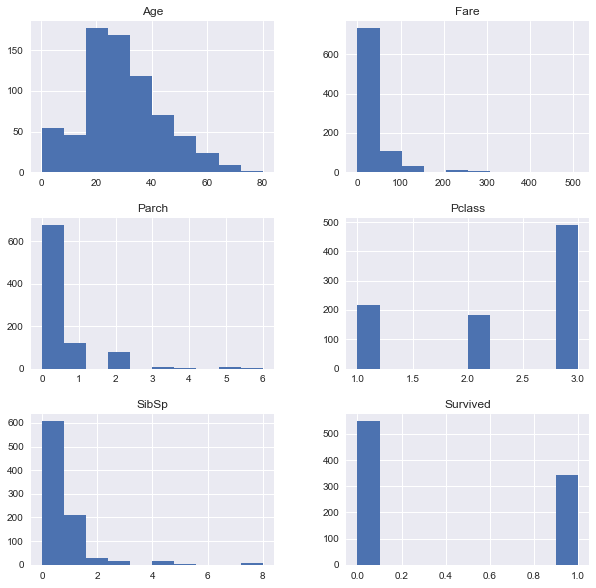

In [21]:
# histogram for all numerical columns
df.hist(figsize=(10,10))
#only numeric columns are displayed in histograms

- A lot of people were in 20s and 30s.
- Some people paid more than 400 dollars
- A lot of people in 3rd class (cheaper than 1st and 2nd class)
- More dead than survived

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c5a7e50>]], dtype=object)

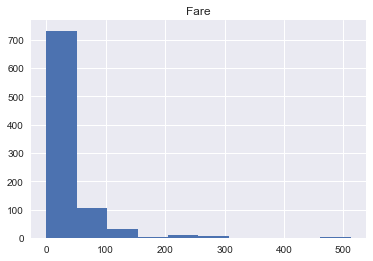

In [22]:
# histogram for Fare alone
df.hist('Fare')

### Histogram with Groupby

Survived
0    [[Axes(0.125,0.670278;0.336957x0.209722), Axes...
1    [[Axes(0.125,0.670278;0.336957x0.209722), Axes...
dtype: object

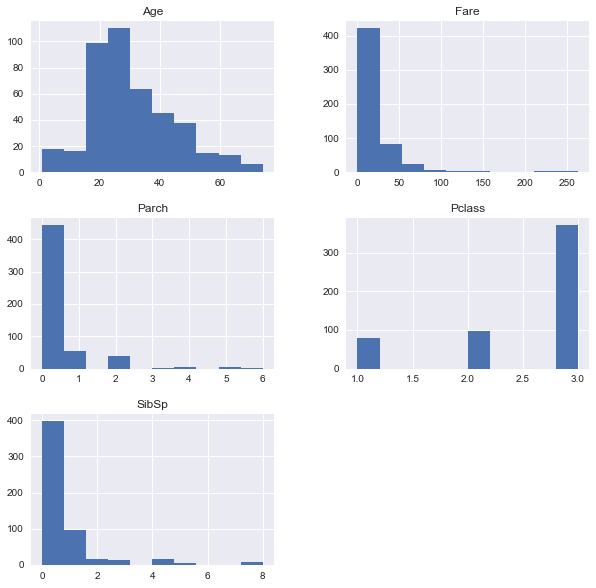

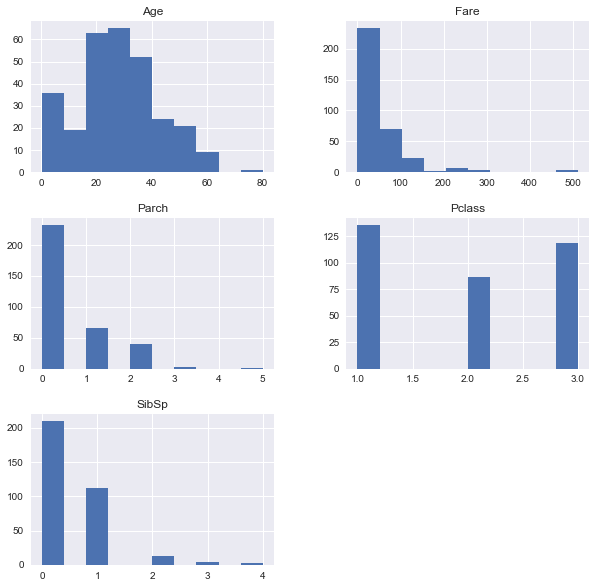

In [23]:
df.groupby('Survived').hist(figsize=(10,10))

#Figure 1: those died; Figure 2: those survived

Survived
0    [[Axes(0.125,0.125;0.775x0.755)]]
1    [[Axes(0.125,0.125;0.775x0.755)]]
dtype: object

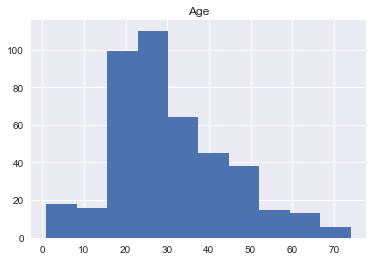

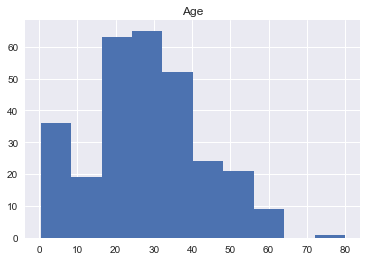

In [51]:
df.groupby('Survived').hist('Age')
#top graph (not survived); bottom graph (survived)

Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

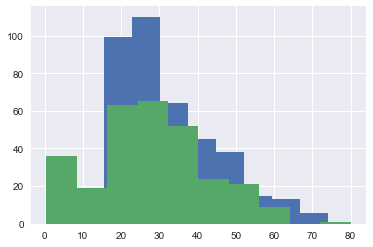

In [52]:
#overlapping two graphs

df.groupby('Survived').Age.hist(alpha=0.9)
#Survived value of 0 in blue and Survived value of 1 in green
#the younger passenger, the higher survival rate
#alpha : color darkness

Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Pclass, dtype: object

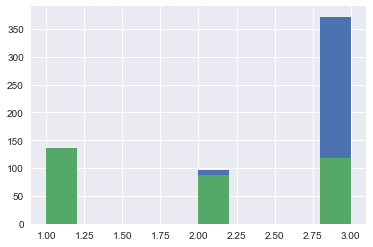

In [26]:
# overlapping Survivied and Pclass
df.groupby('Survived').Pclass.hist(alpha=0.9)



# Data Visualization with Seaborn
- This package creates statistical data visualizations
http://stanford.edu/~mwaskom/software/seaborn/tutorial/categorical_linear_models.html

### Chart with Linear Regression for numerical columns

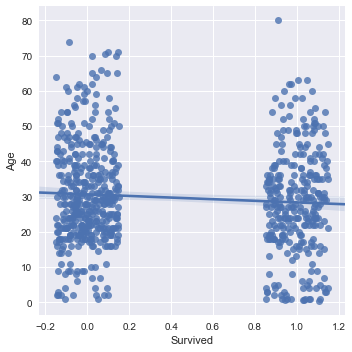

In [27]:
# linear regression & scatter chart for Survived and Age
sns.lmplot("Survived", "Age", df, x_jitter=.15)

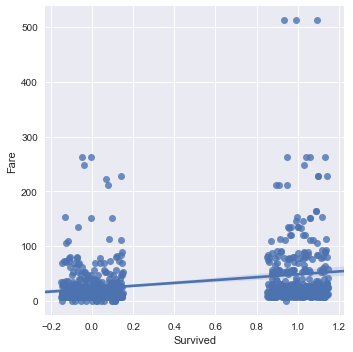

In [28]:
# linear regression & scatter chart for Survived and Fare
sns.lmplot("Survived", "Fare", df, x_jitter=.15)

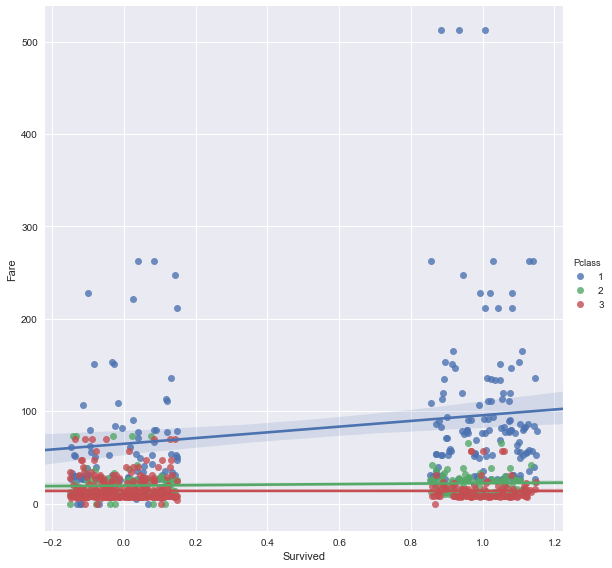

In [29]:
# linear regression & scatter chart for Survived and Fare
# use Pclass as groups or hue
sns.lmplot("Survived", "Fare", df, hue="Pclass", x_jitter=.15, size=8)

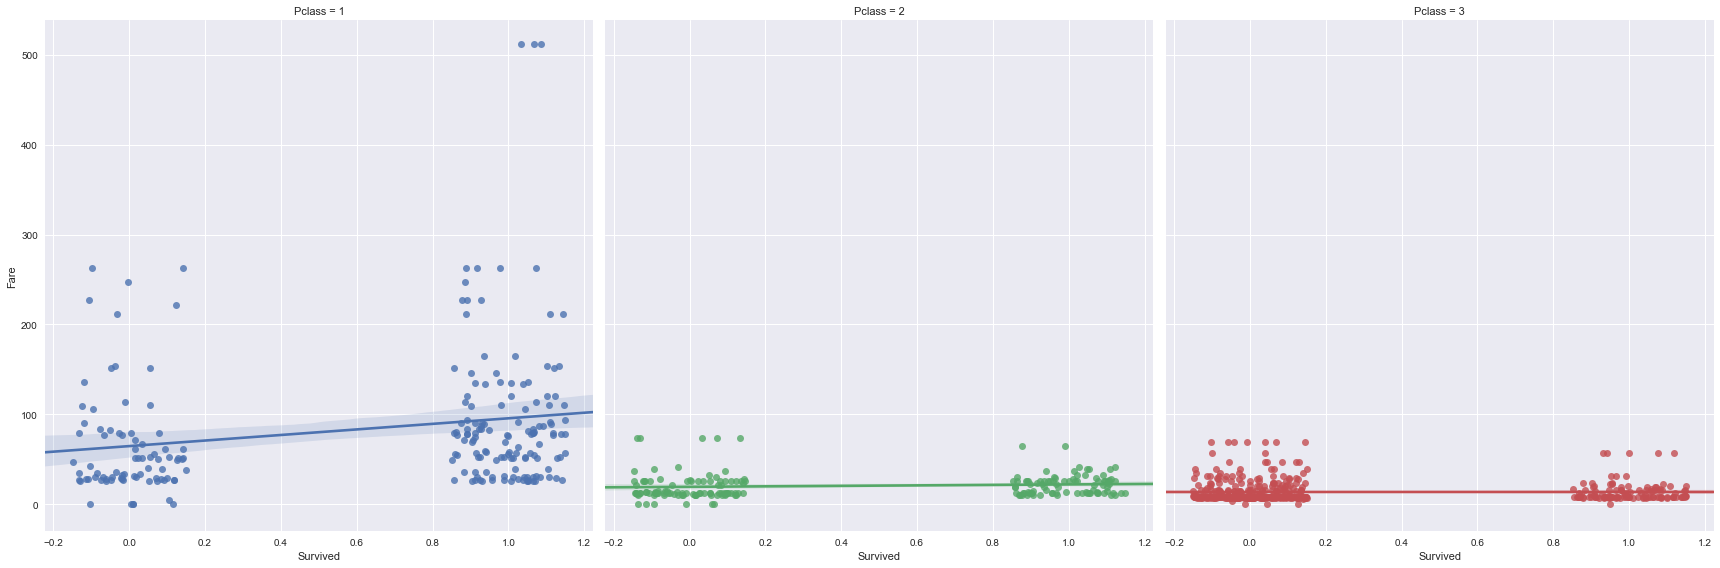

In [30]:
# Individual charts
sns.lmplot("Survived", "Fare", df, col="Pclass", hue="Pclass", x_jitter=.15, size=8)

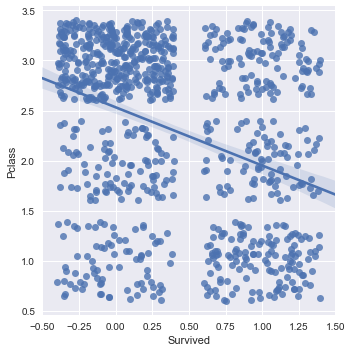

In [31]:
# linear regression & scatter chart for Survived and Pclass
sns.lmplot("Survived", "Pclass", df, y_jitter=0.40, x_jitter=.40)

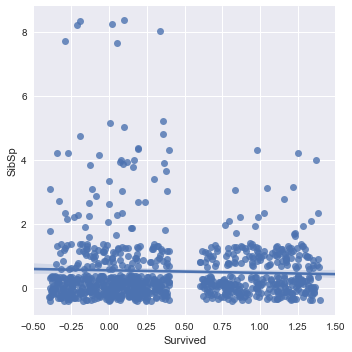

In [32]:
## linear regression & scatter chart for Survived and SibSp
sns.lmplot("Survived", "SibSp", df, y_jitter=0.40, x_jitter=.40)

### When dealing with categorical columns (e.g., Pclass), other plots (e.g., factorplot) work well.

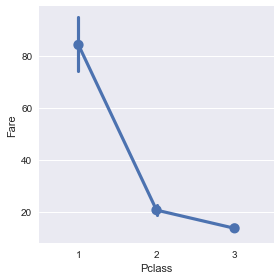

In [42]:
# factorplot for Pclass and Fare
import seaborn as sns
sns.factorplot("Pclass", "Fare", data=df)

In [43]:
# factorplot for Survived and Fare


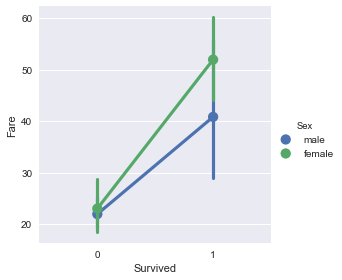

In [44]:
# factorplot for Survived, Fare, Sex
sns.factorplot("Survived", "Fare", "Sex", data=df)

In [45]:
# factorplot for Survived, Fare, Embarked


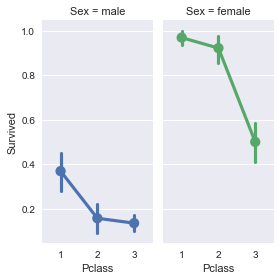

In [46]:
#factorplot() is using a FacetGrid, so all of the options for structuring the plot into different subsets are available:
sns.factorplot("Pclass", "Survived", "Sex", data=df, col="Sex", aspect=.5)

In [47]:
# Try something different



In [1]:
# FaceGrid
g = sns.FacetGrid(df, col="Survived")
g.map(plt.hist, "Fare")

NameError: name 'sns' is not defined

## More detailed analysis using Matplotlib & Probability information

### Survived in terms of Pclass

In [34]:
#how many people were in each class
count = df.groupby('Pclass').count()

#how many people were in each class in terms of the survived column only
survival_count = df.groupby('Pclass').Survived.count()

#how many people in each class actually survived ... someone survived then the column has the value "1", if not "0"
#then, adding the 1's can help us find out how many people in each class actuall survived
survival_sum = df.groupby('Pclass').Survived.sum()

print count
print survival_count
print survival_sum

        Survived  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  Embarked
Pclass                                                                       
1            216   216  216  186    216    216     216   216    176       214
2            184   184  184  173    184    184     184   184     16       184
3            491   491  491  355    491    491     491   491     12       491
Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


In [35]:
#survival probability of each class
survival_prob = survival_sum / survival_count
print survival_prob

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


AttributeError: 'module' object has no attribute 'xlabel'

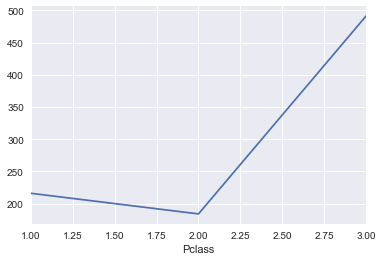

In [36]:
plt.figure
survival_count.plot()
#plt.plot(survival_count)
plt.xlabel('Pclass')
plt.ylabel('Count of Passengers')
plt.title("Passengers by Pclass")

In [ ]:
survival_prob.plot()

AttributeError: 'module' object has no attribute 'xlabel'

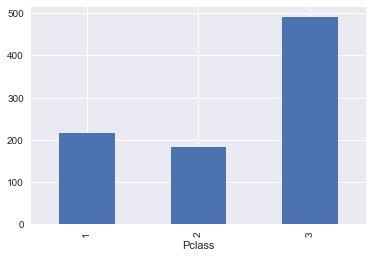

In [37]:
plt.figure
survival_count.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Count of Passengers')
plt.title("Passengers by Pclass")

plt.figure()
survival_prob.plot(kind = 'bar')
plt.xlabel('Pclass')
plt.ylabel('Probability of Survival')
plt.title("Probability of survival by class")

### Survived in terms of Sex

In [38]:
#how many people were in each class
count = df.groupby('Sex').count()

#how many people were in each class in terms of the survived column only
survival_count = df.groupby('Sex').Survived.count()

#how many people in each class actually survived ... someone survived then the column has the value "1", if not "0"
#then, adding the 1's can help us find out how many people in each class actuall survived
survival_sum = df.groupby('Sex').Survived.sum()

print count
print survival_count
print survival_sum

        Survived  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  Cabin  \
Sex                                                                      
female       314     314   314  261    314    314     314   314     97   
male         577     577   577  453    577    577     577   577    107   

        Embarked  
Sex               
female       312  
male         577  
Sex
female    314
male      577
Name: Survived, dtype: int64
Sex
female    233
male      109
Name: Survived, dtype: int64


In [39]:
#survival probability of each class
survival_prob = survival_sum / survival_count
print survival_prob

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


AttributeError: 'module' object has no attribute 'xlabel'

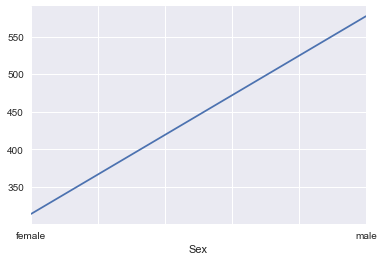

In [40]:
plt.figure
survival_count.plot()
#plt.plot(survival_count)
plt.xlabel('Sex')
plt.ylabel('Count of Passengers')
plt.title("Passengers by Pclass")

In [ ]:
survival_prob.plot()

### Survived in terms of Embarked